### Exercícios práticos 04 - Syanne Tavares

#### Resolução de sistemas lineares

- Podem ter 3 situações

1. Solução única -> retas concorrentes -> se tocam em 1 único ponto
2. Infinitas soluções -> retas coicidentes - pode ser qualquer tipo de valor
3. Sem solução -> Reta paralelas 

- 2 formas de resolver 
1. Métodos Diretos 
2. Métodos iterativos


## Exercício 01 - 

Implemente todas as técnicas de solução de sistemas lineares vistas em aula e faça uma comparação entre elas para as seguintes situações

# Métodos Diretos

# 1. Eliminação de Gauss
Resumidamente -> transforma o sistema em um sistema equivalente do tipo triangular superior e resolve a partir disso

In [1]:
import numpy as np
import pandas as pd

  
# Resolve o sistema triangular superior.
def SistemaTriangularSuperior(Ax,b):
  """Função que resolve um sistema linear triangular superior do tipo  𝐴𝑥 = b que recebe como parâmetro """
  n = len(b) #tamanho do vetor b
  x= [b[i]/Ax[i][i] if i == 0 else None for i in range(0,len(b))]

  x[n-1] = b[n-1]/Ax[n-1][n-1]
  iter = 0
  for i in list(range(n-1,0,-1)):
    iter+=1
    s = 0
    for j in list(range(i+1,n+1)):
      s = s + Ax[i-1][j-1]*x[j-1]

    x[i-1] = (b[i-1]-s)/(Ax[i-1][i-1])

  return [x,iter]

def EliminacaoDeGauss(A,b):
  """Função que resolve um sistema linear do tipo Ax = b que recebe como parâmetro
     Return : retorna o vetor x resultante"""
  
  # ELIMINAÇÃO DE GAUSS
  n = len(b)

  # Calculo dos pivos.
  for k in range(1,n+1):
    # PIVOTEAMENTO PARCIAL
    for i in range(k+1, len(A)+1):
      if (abs(A[i-1][k-1]) > abs(A[k-1][k-1])):
        [A[k-1], A[i-1]] = [A[i-1], A[k-1]]
        [b[k-1], b[i-1]] = [b[i-1], b[k-1]]

    # Calculo dos multiplicadores.
    for i in list(range(k+1,n+1)):
      m = A[i-1][k-1]/A[k-1][k-1]
      A[i-1][k-1] = 0
      
      # Atualizar demais valores da linha
      for j in list(range(k+1,n+1)):
        A[i-1][j-1] = A[i-1][j-1]-m*A[k-1][j-1]
      b[i-1] = b[i-1] - m*b[k-1]

  # print("depois da eliminação\n Ax =  ",Ax2,"\nb = ",b2)
  x = SistemaTriangularSuperior(A,b)
  return(x)

In [2]:
Ax = [[3, 2, 4],
      [1, 1, 2],
      [4, 3,-2]]
b = [1, 2, 3]

print("X: ",EliminacaoDeGauss(Ax,b)[0])

X:  [-3.0, 5.0, 0.0]


# 2. Fatoração LU com pivoteamento parcial

#### O processo de fatoração consistem em decompor a matriz A em um produto de dois ou mais fatores
▪ De forma que seja mais fácil resolver o sistema em etapas

In [3]:
def formata_matriz(M):
  """Função que printa uma matriz formatando-a"""
  m = len(M) # número de linhas
  n = len(M[0]) # número de colunas
  s = ""
  for i in range(m):
      for j in range(n):
          s += "%9.3f " % M[i][j]
      s +=  "\n"
  return s

# Resolve o sistema triangular inferior.
def SistemaTriangularInferior(Ax,b):
  """Função que resolve um sistema triangular inferior"""
  n = len(b)
  
  y= [b[i]/Ax[i][i] if i == 0 else None for i in range(0,len(b))]
  iter = 0 
  for i in list(range(1,n+1,1)):
    iter+=1
    s = 0
    for j in list(range(1,i,1)):
      s = s + Ax[i-1][j-1]*y[j-1]

    y[i-1] = b[i-1] - s

  return y,iter

def LU_PivParc(A,b):
  """Função que resolve um sistema linear do tipo Ax = b usando o método de Fatoração LU com pivoteamento parcial 
     A = matriz de coeficientes
     b = vetor b resultante
     Retorna um vetor x calculado"""
  n = len(A)
  p=[0]*n
  

  ###### pivoteamento parcial 
  p = list(range(1,n+1)) #"matriz permutação"

  for k in range(1,n+1):
    pv = abs(A[k-1][k-1])
    Lpivo = k

    for i in range(k+1,n+1):
        if abs(A[i-1][k-1])> pv :
          pv = abs(A[i-1][k-1])
          Lpivo = i
  
    if pv == 0: 
      return None #matriz singular
      

    if Lpivo != k : # se for diferente então tem que realizar a permutação
      [p[k-1],p[Lpivo-1]] = [p[Lpivo-1],p[k-1]] # recurso guanabaristico
    
      for j in range(1,n+1):
          [A[k-1][j-1],A[Lpivo-1][j-1]] = [A[Lpivo-1][j-1],A[k-1][j-1]] 

  # resolução dos sistemas triangulares
  # Calculo dos pivos.
  for k in range(1,n+1):
    # Calculo dos multiplicadores.
    for i in range(k+1,n+1):
      m = A[i-1][k-1]/A[k-1][k-1]
      A[i-1][k-1] = m
      # Atualizar demais valores da linha
      for j in range(k+1,n+1,1):
        A[i-1][j-1] = A[i-1][j-1]-m*A[k-1][j-1]
  ### multiplicação da b pela "matriz permutação"
  c=[None for _ in range(0,len(b))]
  for i in range(1,n+1):
    Lpivo = p[i-1]
    c[i-1]=b[Lpivo-1]

  # resolução dos sistemas 
  y = SistemaTriangularInferior(A,c)
  x = SistemaTriangularSuperior(A,y[0])
  x[1] = y[1]+x[1]

  return x

#### Exemplo 

In [4]:
# Teste com dados.
Ai = [[3, -4, 1],
      [1, 2, 2],
      [4, 0, -3]]

bi = [9, 3, -2]

print("Ai = \n",formata_matriz(Ai))
#Obtendo os fatores L e U.
print("X =")
print(LU_PivParc(Ai,bi)[0])

Ai = 
     3.000    -4.000     1.000 
    1.000     2.000     2.000 
    4.000     0.000    -3.000 

X =
[1.0, -1.0, 2.0]


## Métodos iterativos



### 3. Gauss-Jacobi

In [5]:
def precisao_maquina():
    """Função que calcula a precisão da máquina com referência igual a 1"""
    A=1
    S=2

    while(S>1):
        A=A/2
        S=1+A
    prec=2*A

    return prec

In [6]:
import math
def TesteConvergencia(MatrizA):
    """Função que realiza teste de convergência pra uma matriz A
        Retorna True caso a seja convergente e False caso contrário"""
    Alfas=list()

    for i in range(len(MatrizA)):
        s=0
        for j in range(len(MatrizA)):
            if j!=i:
                s+=MatrizA[i][j]

        Alfas.append(s/MatrizA[i][i])
    # print(Alfas)
    # print(max(Alfas))

    if max(Alfas) < 1:
        return True
    else:
        return False
def criterioParada(x,xk,precisao=precisao_maquina()):
    """Função que compara x com x-1 verificando a precisão do método como um critério de parada"""
    soma = 0
    zip_object = zip(x, xk) # une as informações de duas variáveis
    for list1_i, list2_i in zip_object:
        soma = soma + math.fabs(list1_i-list2_i)

    if (soma < precisao):
        return True
    else:
        return False   
            
def GaussJacobi(MatrizA,b,max_iteracoes=300,precisao=precisao_maquina()):
    """Função que resolve um sistema linear do tipo Ax = b através do método iterativo de Gauss-Jacobi 
    Parâmetros:
        MatrizA = matriz de coeficientes do sistema linear
        b = vetor b
        max_iteracoes = npumero máximo de iterações
        precisao = precisão do erro
        
        retorno: tupla com
      vetor x resultante e com o número de iterações"""
    n= len(b) #tamanho de do vetor base

    X=b.copy() # copiando b pra x como chute inicial
    solucao = True
    # gerar chute inicial
    for i in list(range(1,n+1)): # percorre cada elemento de x de 1 até n
        # dividir pelo elemento da diagonal principal
        if math.fabs(MatrizA[i-1][i-1])> 0 :# verifica se é possível realizar divisão se a diagonal é diferente de zero
            X[i-1] = b[i-1]/MatrizA[i-1][i-1]
        else:
            solucao = False # não se pode calcular o chute inicial
            break
    if solucao and TesteConvergencia(MatrizA):
        # print("Iteração 0")
        # print("x = ",X)

        xk = X.copy()

        iter = 0
        
        # realiza o calculo de uma função iteração
        while (iter < max_iteracoes): # início das iterações
            iter = iter + 1
            for i in list(range(1,n+1)):
                s = 0

                #realiza o somatório
                for j in list(range(1,n+1)):
                    if ((i-1) != (j-1)):
                        s = s + MatrizA[i-1][j-1]*X[j-1] # somando os termos que não são da diagonal

                xk[i-1] = (1/MatrizA[i-1][i-1])*(b[i-1]-s) # equivale a 1/a(ii)*(bi - somatório de aij*xj)
                
            # print("Iteração: ",iter)
            # print("xk = ",xk)

            #verifica o critério de parada ->  O processo é repetido até ue x^k e x^k-1 eestejam suficientemente próximos
            if criterioParada(X,xk,precisao):
                X = xk.copy()
                break    
            X = xk.copy()
      
        return X,iter
    else:
        return None,None

#### Exemplo

In [7]:
#exemplo 

A = [[10, 2,  1],
     [ 1, 5,  1],
     [ 2, 3, 10]]

b = [7, -8, 6]

x,iter = GaussJacobi(A,b,10,0.01)
print("x = ",x)
print("N iterações = ",iter)

x =  [1.000236, -1.9989360000000003, 1.000284]
N iterações =  5


### 4. Gauss-Seidel

In [8]:
def GaussSeidel(MatrizA,b,max_iteracoes=300,precisao=precisao_maquina()):
    """Função que resolve um sistema linear do tipo Ax = b através do método iterativo de Gauss-Seidel
      Parâmetros:
      MatrizA = matriz de coeficientes do sistema linear
      b = vetor b
      max_iteracoes = npumero máximo de iterações
      precisao = precisão do erro
      
      retorno: tupla com
      vetor x resultante e com o número de iterações """
    n= len(b) #tamanho de do vetor base

    X=b.copy() # copiando b pra x como chute inicial
    solucao = True
    # gerar chute inicial
    for i in list(range(1,n+1)): # percorre cada elemento de x de 1 até n
        # dividir pelo elemento da diagonal principal
        if math.fabs(MatrizA[i-1][i-1])> 0 :# verifica se é possível realizar divisão se a diagonal é diferente de zero
            X[i-1] = b[i-1]/MatrizA[i-1][i-1]
        else:
            solucao = False # não se pode calcular o chute inicial
            break
    if solucao and TesteConvergencia(MatrizA):
      # print("Iteração 0")
      # print("x = ",X)

      xk = X.copy()

      iter    = 0
      
      # realiza o calculo de uma função iteração
      while (iter < max_iteracoes): # início das iterações
        iter = iter + 1
        for i in list(range(1,n+1)):
          s = 0

          #realiza o somatório
          for j in list(range(1,n+1)):
            if ((i-1) > (j-1)): # se o índice da linha é maior que o da coluna
              s = s + MatrizA[i-1][j-1]*xk[j-1] # usa o xk que tem os valores atualizados
            elif ((i-1) < (j-1)): # se o índice da linha é maior que o da coluna
              s = s + MatrizA[i-1][j-1]*X[j-1] 

          xk[i-1] = (1/MatrizA[i-1][i-1])*(b[i-1]-s) # equivale a 1/a(ii)*(bi - somatório de aij*xj)
      
        # print("Iteração: ",iter)
        # print("xk = ",xk)

        #verifica o critério de parada ->  O processo é repetido até ue x^k e x^k-1 eestejam suficientemente próximos
        if criterioParada(X,xk,precisao):
          X = xk.copy()
          break    
        X = xk.copy()
     
      return X,iter
    else:
       return None,None

#### Exemplo

In [9]:
#exemplo 

A = [[10, 2,  1],
     [ 1, 5,  1],
     [ 2, 3, 10]]

b = [7, -8, 6]

x,iter = GaussSeidel(A,b,10,0.01)
print("x = ",x)
print("N iterações = ",iter)


x =  [0.9999577430400001, -2.000046123328, 1.0000222883904002]
N iterações =  4


## Comparação entre os métodos
### Implemente todas as técnicas de solução de sistemas  lineares vistas em aula e faça uma comparação entre elas para as seguintes situaçõe
- n - [10,1000,2000,3000,...20000]
- Gere Sistemas lineares Aleatórios que atendam essas condições

In [10]:
def mudancaAleatoria(mat):

    n = mat.shape[0] 
    lin = np.random.randint(n)

    if(np.random.rand()>0.25):
        mat[lin,:] +=np.random.rand()*mat[np.random.randint(n),:] # 
    else:
        mat[lin,:]-=np.random.rand()*mat[np.random.randint(n),:]

def gerarSistema(n,Intervalo_round=[9,15]):
    """Função que gera um sistema linear do tipo Ax = b\n
      Parâmetros :\n
      n = Dimensão do sistema Linear\n
      Intervalo_round = intervalo que contém o número de mudanças Aleatórias que serão realizadas. É proporcional à densidade. 
      """
    mat = np.zeros((n,n+1)) # cria uma matriz zerada de dimensão n
    # print(mat)
    b= np.random.random(n) # gera um b aleatório
    mat[:,n]= b # adiciona esse b como última coluna da matriz
    # print(mat)
    mat[:,:-1] = np.identity(n) # cria uma matriz identidade 
    # print(mat)
    mat * np.random.randint(50,100)
    # print(mat)

    rounds = np.random.randint(Intervalo_round[0],Intervalo_round[1])
    while(rounds>0) :
        mudancaAleatoria(mat)
        rounds-=1
        # print("mudou")
        # print(mat)
    A = mat[:,:-1].tolist()
    x = b.tolist()
    newb = [element[0] for element in mat[: , -1:].tolist()]

    # print("Exemplos: ")
    # print("Matriz: \n",A)
    # print("x = ",x)
    # print("b = ",newb)

    return(A,x,newb)


In [11]:

def GetExemploSistemasLineares(Dimensao_n,it_max=300,precisao=precisao_maquina(),metodos=[1,2,3,4]):
    """FUNÇÃO QUE GERA UM EXEMPLO DE SISTEMA LINEAR DE DIMENSÃO RECBIDA POR PARÂMETRO E RESOLVE POR MÉTODOS DIRETOS E ITERATIVOS COMPARANDO OS RESULTADOS\n
        Parâmetros\n
        Dimensao_n = Dimensão da matriz de exemplo\n
        it_max : número máximo de iterações pros métodos iterativos\n
        precisao: precisão a ser utilizada nos métodos iterativos\n
        metodos : lista com os números dos métodos a serem utilizados [1(Eliminação de Gauss),2(LU com piv parc),3(Gauss-Jacobi),4(Gauss-Seidel)]
        """

    Ax,x,b = gerarSistema(Dimensao_n)
    results={"X":x}
    if 1 in metodos:
          results["Eliminação de Gauss"]=EliminacaoDeGauss(Ax,b)[0]
    if 2 in metodos:
          results["Fatoração LU e Piv Parc:"]=LU_PivParc(Ax,b)[0]
    if 3 in metodos:        
        resultJacobi,iteracoes = GaussJacobi(Ax,b,it_max,precisao)
        results[f"Gauss-Jacobi {iteracoes} iterações:"] = resultJacobi
    if 4 in metodos:  
        resultSeidel,iteracoes = GaussSeidel(Ax,b,it_max,precisao)
        results[f"Gauss-Seidel {iteracoes} iterações:"]=resultSeidel

    print("\nCOMPARAÇÃO RESULTADOS: \n")

#     print("X por eliminação de gauss: ",EliminacaoDeGauss(Ax,b))
#     print("X por Fatoração LU com pivoteamento parcial: ",LU_PivParc(Ax,b))
#     print(f"X por Gauss-Jacobi: {resultJacobi}, com {iteracoes} iterações") 
#     print(f"X por Gauss-Seidel: {resultSeidel}, com {iteracoes2} iterações")

    tabela = pd.DataFrame(results)
    display(tabela)

    return Ax,b,results

In [12]:
def ResolveSistemasLineares(Ax,x,b,it_max=300,precisao=precisao_maquina(),metodos=[1,2,3,4]):
    """RESOLVE POR MÉTODOS DIRETOS E ITERATIVOS COMPARANDO OS RESULTADOS\n
        Parâmetros\n
        Ax = Matriz de coeficientes\n
        b= vetor b
        x= resolução do sistema linear pra comparação com os métodos
        it_max : número máximo de iterações pros métodos iterativos\n
        precisao: precisão a ser utilizada nos métodos iterativos\n
        metodos : lista com os números dos métodos a serem utilizados [1(Eliminação de Gauss),2(LU com piv parc),3(Gauss-Jacobi),4(Gauss-Seidel)]
        """
    results={"X":x}
    if 1 in metodos:
          results["Eliminação de Gauss"]=EliminacaoDeGauss(Ax,b)[0]
    if 2 in metodos:
          results["Fatoração LU e Piv Parc:"]=LU_PivParc(Ax,b)[0]
    if 3 in metodos:        
        resultJacobi,iteracoes = GaussJacobi(Ax,b,it_max,precisao)
        results[f"Gauss-Jacobi {iteracoes} iterações:"] = resultJacobi
    if 4 in metodos:  
        resultSeidel,iteracoes = GaussSeidel(Ax,b,it_max,precisao)
        results[f"Gauss-Seidel {iteracoes} iterações:"]=resultSeidel

    print("\nCOMPARAÇÃO RESULTADOS: \n")

#     print("X por eliminação de gauss: ",EliminacaoDeGauss(Ax,b))
#     print("X por Fatoração LU com pivoteamento parcial: ",LU_PivParc(Ax,b))
#     print(f"X por Gauss-Jacobi: {resultJacobi}, com {iteracoes} iterações") 
#     print(f"X por Gauss-Seidel: {resultSeidel}, com {iteracoes2} iterações")

    tabela = pd.DataFrame(results)
    display(tabela)

### Matriz 10x10

In [13]:
A,x,b = gerarSistema(10,[9,13])
display(pd.DataFrame(A))
ResolveSistemasLineares(A,x,b)


,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
1,0.000000,1.000000,0.00000,0.0,0.420220,0.0,0.0,0.000000,0.0,-0.705740
2,0.445353,0.000000,1.00000,0.0,0.000000,0.0,0.0,-0.369944,0.0,0.000000
3,0.000000,0.000000,0.00000,1.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
4,0.000000,0.000000,0.00000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.000000
5,0.000000,0.552536,0.00000,0.0,0.000000,1.0,0.0,0.873915,0.0,0.000000
6,0.000000,0.000000,0.00000,0.0,-0.852675,0.0,1.0,0.000000,0.0,1.432028
7,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000
8,0.261279,0.000000,0.58668,0.0,0.313628,0.0,0.0,0.000000,1.0,0.000000
9,0.000000,0.000000,0.00000,0.0,-1.072347,0.0,0.0,0.000000,0.0,1.800956



COMPARAÇÃO RESULTADOS: 



,X,Eliminação de Gauss,Fatoração LU e Piv Parc:,Gauss-Jacobi 3 iterações:,Gauss-Seidel 3 iterações:
0,0.981936,0.981936,0.981936,0.981936,0.981936
1,0.565696,0.565696,0.565696,0.565696,0.565696
2,0.115325,0.115325,0.115325,0.115325,0.115325
3,0.752636,0.752636,0.752636,0.752636,0.752636
4,0.739060,0.739060,0.739060,0.739060,0.739060
5,0.273600,0.273600,0.273600,0.273600,0.273600
6,0.598462,0.598462,0.598462,0.598462,0.598462
7,0.983650,0.983650,0.983650,0.983650,0.983650
8,0.379115,0.379115,0.379115,0.379115,0.379115
9,0.589789,0.589789,0.589789,0.589789,0.589789


### Obs: Se forem matrizes pequenas é melhor usar o GetExemploSistemasLineares, 
 - Matrizes de dimensão grande é melhor gerar a matriz alterando o intervalo do round e depois resolver o sistema.
 - Tudo depende do interavalo do Round -> quantas vezes uma mudsança Aleatória será realizada

In [14]:
A,b,Results = GetExemploSistemasLineares(10)
print("Matriz:\n ")
display(pd.DataFrame(A))




COMPARAÇÃO RESULTADOS: 



,X,Eliminação de Gauss,Fatoração LU e Piv Parc:,Gauss-Jacobi None iterações:,Gauss-Seidel None iterações:
0,0.386822,0.386822,0.386822,None,None
1,0.660409,0.660409,0.660409,None,None
2,0.422044,0.422044,0.422044,None,None
3,0.089025,0.089025,0.089025,None,None
4,0.862245,0.862245,0.862245,None,None
5,0.814879,0.814879,0.814879,None,None
6,0.256221,0.256221,0.256221,None,None
7,0.197613,0.197613,0.197613,None,None
8,0.148473,0.148473,0.148473,None,None
9,0.052668,0.052668,0.052668,None,None


Matriz:
 


,0,1,2,3,4,5,6,7,8,9
0,1.0,-0.415448,0.0,0.000000,0.499983,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,0.0,1.269839,0.0,0.000000,-0.324746,1.805953,0.022112,0.391567,0.000000,-5.162327e-01
2,0.0,0.000000,1.0,0.538913,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
3,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
4,0.0,0.000000,0.0,0.000000,0.787501,1.181732,0.014469,0.256223,0.000000,-3.377986e-01
5,0.0,0.000000,0.0,0.000000,0.000000,1.911699,0.000000,-0.150599,0.000000,-5.464603e-01
6,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00
7,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00
8,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.611778,3.980208e-18
9,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00


# Matriz 20x20

In [15]:
A,x,b = gerarSistema(20,[100,150])
while not TesteConvergencia(A):
  A,x,b = gerarSistema(20,[50,60])

display(pd.DataFrame(A))
ResolveSistemasLineares(A,x,b)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.198616,0.0,-0.055041,-1.346494,0.000000,0.080051,-0.305565,0.993786,-0.732298,0.0,0.0,0.000000,0.019505,0.000000,0.000000,0.026515,0.000000,-0.860222,-0.452539,0.000000
1,0.000000,1.0,0.000000,0.000000,-0.262662,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.311547,0.000000,0.745335,-0.116650,0.000000
2,0.000000,0.0,1.453217,0.000000,0.000000,0.012607,0.000000,0.000000,0.000000,0.0,0.0,0.533336,-0.514981,0.000000,0.000000,0.000000,0.000000,0.798633,0.000000,-0.656598
3,1.042931,0.0,0.019980,0.488777,0.000000,-0.029059,-1.604518,0.000000,0.265824,0.0,0.0,0.000000,-0.007080,0.000000,0.000000,0.139230,0.000000,0.312261,-0.021057,0.000000
4,0.337819,0.0,0.000000,0.000000,0.986143,0.000000,0.016708,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-0.059124,0.000000,0.000000,0.437951,0.000000
5,0.000000,0.0,-0.687577,0.000000,0.000000,1.000000,-0.657034,0.000000,0.000000,0.0,0.0,0.000000,0.444668,0.593700,-0.520788,0.147784,0.533665,0.000000,-0.494013,0.000000
6,0.014694,0.0,0.000000,0.000000,-0.575855,0.009873,0.973337,0.000000,0.000000,0.0,0.0,0.417685,0.000000,0.000000,0.000000,0.460976,0.000000,0.118698,-0.255740,0.000000
7,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.513739,0.000000
8,0.000000,0.0,-0.105617,0.040421,0.508759,0.153608,-0.100925,0.000000,1.021983,0.0,0.0,0.000000,-0.011767,0.000000,0.102673,-0.000267,-0.130609,0.169991,0.225942,0.035016
9,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000



COMPARAÇÃO RESULTADOS: 



,X,Eliminação de Gauss,Fatoração LU e Piv Parc:,Gauss-Jacobi 10 iterações:,Gauss-Seidel 10 iterações:
0,0.981852,0.981852,0.981852,0.981852,0.981852
1,0.567717,0.567717,0.567717,0.567717,0.567717
2,0.003858,0.003858,0.003858,0.003858,0.003858
3,0.227734,0.227734,0.227734,0.227734,0.227734
4,0.171141,0.171141,0.171141,0.171141,0.171141
5,0.619477,0.619477,0.619477,0.619477,0.619477
6,0.841524,0.841524,0.841524,0.841524,0.841524
7,0.268849,0.268849,0.268849,0.268849,0.268849
8,0.170942,0.170942,0.170942,0.170942,0.170942
9,0.683641,0.683641,0.683641,0.683641,0.683641


In [16]:
A,x,b = gerarSistema(1000,[1000,2000])
# while not TesteConvergencia(A):
#   A,x,b = gerarSistema(1000,[100,200])
display(pd.DataFrame(A))
ResolveSistemasLineares(A,x,b)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0



COMPARAÇÃO RESULTADOS: 



,X,Eliminação de Gauss,Fatoração LU e Piv Parc:,Gauss-Jacobi None iterações:,Gauss-Seidel None iterações:
0,0.004731,0.004731,0.004731,None,None
1,0.107133,0.107133,0.107133,None,None
2,0.465677,0.465677,0.465677,None,None
3,0.135824,0.135824,0.135824,None,None
4,0.446569,0.446569,0.446569,None,None
...,...,...,...,...,...
995,0.078421,0.078421,0.078421,None,None
996,0.952992,0.952992,0.952992,None,None
997,0.827401,0.827401,0.827401,None,None
998,0.152069,0.152069,0.152069,None,None


### Exemplos com sistemas Esparsos 
  - Grande número de zeros 
  - Números pequenos pro intervalo do round
  - proporcional à dimensão

In [17]:
A,x,b = gerarSistema(10,[1,10])

display(pd.DataFrame(A))
ResolveSistemasLineares(A,x,b)

,0,1,2,3,4,5,6,7,8,9
0,1.217313,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000
1,0.000000,1.0,0.0,0.0,-0.692277,0.299301,0.0,0.38005,-0.236809,-0.070773
2,0.000000,0.0,1.0,0.0,0.367105,0.000000,0.0,0.00000,0.125577,0.037530
3,0.000000,0.0,0.0,1.0,0.000000,0.473579,0.0,0.00000,0.000000,0.000000
4,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.0,0.00000,0.342073,0.102232
5,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,0.00000,0.000000,0.729891
6,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,0.00000,0.000000,0.000000
7,0.000000,0.0,0.0,0.0,0.000000,0.787530,0.0,1.00000,0.000000,0.000000
8,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,1.000000,0.000000
9,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,1.000000



COMPARAÇÃO RESULTADOS: 



,X,Eliminação de Gauss,Fatoração LU e Piv Parc:,Gauss-Jacobi 3 iterações:,Gauss-Seidel 3 iterações:
0,0.985185,0.985185,0.985185,0.985185,0.985185
1,0.448941,0.448941,0.448941,0.448941,0.448941
2,0.250315,0.250315,0.250315,0.250315,0.250315
3,0.953209,0.953209,0.953209,0.953209,0.953209
4,0.149717,0.149717,0.149717,0.149717,0.149717
5,0.450092,0.450092,0.450092,0.450092,0.450092
6,0.651665,0.651665,0.651665,0.651665,0.651665
7,0.684872,0.684872,0.684872,0.684872,0.684872
8,0.420383,0.420383,0.420383,0.420383,0.420383
9,0.764623,0.764623,0.764623,0.764623,0.764623


### Exemplo Sistema Denso


In [18]:
A,x,b = gerarSistema(5,[50,60])

while not TesteConvergencia(A):
  A,x,b = gerarSistema(5,[50,60])

display(pd.DataFrame(A))
ResolveSistemasLineares(A,x,b)

,0,1,2,3,4
0,0.889013,-1.652682,-1.542397,1.646602,0.474067
1,9.474680,-7.367482,-13.112978,20.010525,-3.080848
2,0.944336,-3.033862,-1.941594,2.021413,0.878360
3,0.080367,-4.037002,-1.582148,0.350274,1.586739
4,-4.850164,-1.378988,4.545236,-10.420850,5.460377



COMPARAÇÃO RESULTADOS: 



,X,Eliminação de Gauss,Fatoração LU e Piv Parc:,Gauss-Jacobi 5 iterações:,Gauss-Seidel 5 iterações:
0,0.386526,0.386526,0.386526,0.386526,0.386526
1,0.824552,0.824552,0.824552,0.824552,0.824552
2,0.045567,0.045567,0.045567,0.045567,0.045567
3,0.742972,0.742972,0.742972,0.742972,0.742972
4,0.640971,0.640971,0.640971,0.640971,0.640971


# Mostre um gráfico para o tempo de execução e um com o  número de iterações
▪ As linhas devem ser os algoritmos

▪ Um gráfico para sistemas esparsos e outro para os densos

In [19]:
import time
def GetInfosGraficos2(Dimensoes=[2,3,4,5],):
  Resultados={"Dimensoes":Dimensoes,
              "it":[],
              "Times":[]}

  R_It=list()
  Times=list()
  R_It2=list()
  Times2=list()
  R_It3=list()
  Times3=list()
  R_It4=list()
  Times4=list()

  for D in Dimensoes:
    #gerar um sistema de Dimensao D
    Ax,x,b=gerarSistema(D)
    while GaussJacobi(Ax,b)[0] == None:
      Ax,x,b=gerarSistema(D)

    #pegar iterações e tempo por eliminação de gauss
    tempo_inicial=time.time() # em segundos
    R_It.append(EliminacaoDeGauss(Ax,b)[1])
    tempo_final=time.time() # em segundos
    Times.append(tempo_final-tempo_inicial)

    #pegar iterações e tempo por LU
    tempo_inicial=time.time() # em segundos
    R_It2.append(LU_PivParc(Ax,b)[1])
    tempo_final=time.time() # em segundos
    Times2.append(tempo_final-tempo_inicial)

    #pegar iterações e tempo gauss-jacobi
    tempo_inicial=time.time() # em segundos
    R_It3.append(GaussJacobi(Ax,b)[1])
    tempo_final=time.time() # em segundos
    Times3.append(tempo_final-tempo_inicial)

    #pegar iterações e tempo gauss-seidel
    tempo_inicial=time.time() # em segundos
    R_It4.append(GaussSeidel(Ax,b)[1])
    tempo_final=time.time() # em segundos
    Times4.append(tempo_final-tempo_inicial)

  Resultados["it"].append(R_It)
  Resultados["it"].append(R_It2)
  Resultados["it"].append(R_It3)
  Resultados["it"].append(R_It4)

  Resultados["Times"].append(Times)
  Resultados["Times"].append(Times2)
  Resultados["Times"].append(Times3)
  Resultados["Times"].append(Times4)


  return Resultados

In [20]:
EliminacaoGauss=GetInfosGraficos2([10,100,200,300,400,500,600,700,600,700,1000])

In [21]:
print(EliminacaoGauss)

{'Dimensoes': [10, 100, 200, 300, 400, 500, 600, 700, 600, 700, 1000], 'it': [[9, 99, 199, 299, 399, 499, 599, 699, 599, 699, 999], [19, 199, 399, 599, 799, 999, 1199, 1399, 1199, 1399, 1999], [3, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2], [3, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2]], 'Times': [[0.0009958744049072266, 0.15109467506408691, 1.6366114616394043, 4.801336050033569, 11.642694234848022, 25.16193175315857, 50.8739800453186, 78.76822710037231, 55.37053680419922, 76.2122266292572, 147.7459990978241], [0.0005085468292236328, 0.20986580848693848, 1.2196085453033447, 4.589300155639648, 12.13181447982788, 25.18268346786499, 40.80151033401489, 81.31466341018677, 44.7381956577301, 66.2836651802063, 261.51552987098694], [0.0, 0.005445957183837891, 0.03627729415893555, 0.16511249542236328, 0.1907510757446289, 0.3150980472564697, 0.3842904567718506, 0.6592450141906738, 0.4821181297302246, 0.4544692039489746, 1.6586151123046875], [0.0, 0.007374286651611328, 0.057802677154541016, 0.16029810905456543, 0.20869779

In [22]:
import matplotlib.pyplot as plt 
import numpy as np 
  
x = np.array(EliminacaoGauss["Dimensoes"]) 
y =EliminacaoGauss["it"][0]
plt.plot(x, y,marker = '', label="Eliminação de Gauus",color = 'green') 
  
x1 = x
y1 = EliminacaoGauss["it"][1]
plt.plot(x1, y1, '-.',label="LU",marker = '', color = 'red') 

x2 = x
y2 = EliminacaoGauss["it"][2]
plt.plot(x2, y2, '-',label="Gauss-Jacobi",marker = '', color = 'blue') 

x3 = x
y3 = EliminacaoGauss["it"][3]
plt.plot(x3, y3, '-',label="Gauss-seidel",marker = '', color = 'yellow') 

plt.xlabel("n") 
plt.ylabel("Iterações") 
plt.title('multiple plots')
plt.legend()

plt.show()



ModuleNotFoundError: No module named 'matplotlib'

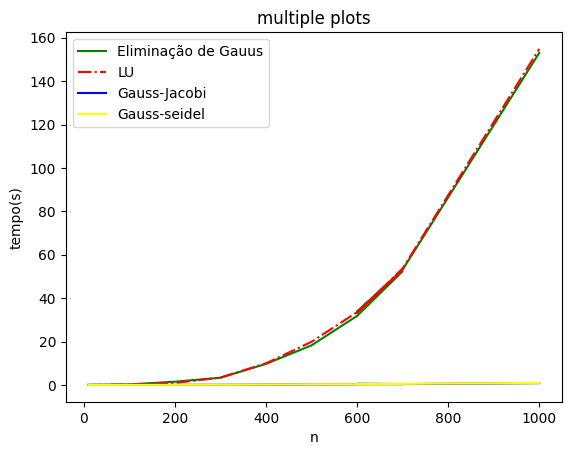

In [ ]:
x = np.array(EliminacaoGauss["Dimensoes"]) 
y =EliminacaoGauss["Times"][0]
plt.plot(x, y,marker = '', label="Eliminação de Gauus",color = 'green') 
  
x1 = x
y1 = EliminacaoGauss["Times"][1]
plt.plot(x1, y1, '-.',label="LU",marker = '', color = 'red') 

x2 = x
y2 = EliminacaoGauss["Times"][2]
plt.plot(x2, y2, '-',label="Gauss-Jacobi",marker = '', color = 'blue') 

x3 = x
y3 = EliminacaoGauss["Times"][3]
plt.plot(x3, y3, '-',label="Gauss-seidel",marker = '', color = 'yellow') 

plt.xlabel("n") 
plt.ylabel("tempo(s)") 
plt.title('multiple plots')
plt.legend()

plt.show()